In [36]:
import pandas as pd
import ast
from geopy.distance import geodesic
from tqdm import tqdm
tqdm.pandas()
from sklearn.model_selection import train_test_split
import ml_help
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
plot_label="Speed (km/h)"
GARDINER_LOCS_MIDDLE_POINT = (43.638933, -79.457196)

In [37]:
inci_df = pd.read_csv("../analysis/050_incidents/050_incidents.csv.zip")
inci_df["collectedAt"] = pd.to_datetime(inci_df["collectedAt"], utc=True)
inci_df["collectedAt"] = inci_df["collectedAt"].dt.floor(freq="t")
inci_df.head()

,iconCategory,magnitudeOfDelay,from,to,length,delay,events,collectedAt,close_to_yonge_detector,close_to_gardiner_detector
0,6.0,2.0,Gardiner Expy/Lake Shore Blvd (ON-11A),Front St (ON-11A),372.918000,199.0,"[{'code': 108, 'description': 'Backed up traff...",2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR
1,7.0,0.0,Front St (Yonge St/ON-11),ON-2/Lake Shore Blvd (Yonge St/ON-11),302.765346,0.0,"[{'code': 500, 'description': 'Lane closed', '...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
2,9.0,0.0,Hwy-11A/York St (Queens Quay),Hwy-11/Yonge St (Queens Quay),273.828235,0.0,"[{'code': 701, 'description': 'Roadworks', 'ic...",2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR
3,7.0,0.0,Church St/Front St E (Wellington St),Bay St (Wellington St),254.244867,0.0,"[{'code': 500, 'description': 'Lane closed', '...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG
4,9.0,0.0,Lower Jarvis St (Lake Shore Blvd/Harbour St),ON-11/Yonge St (Lake Shore Blvd/Harbour St),152.120600,0.0,"[{'code': 701, 'description': 'Roadworks', 'ic...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG


In [38]:
inci_df["events"] = inci_df["events"].apply(lambda x: ast.literal_eval(x))
inci_df

,iconCategory,magnitudeOfDelay,from,to,length,delay,events,collectedAt,close_to_yonge_detector,close_to_gardiner_detector
0,6.0,2.0,Gardiner Expy/Lake Shore Blvd (ON-11A),Front St (ON-11A),372.918000,199.0,"[{'code': 108, 'description': 'Backed up traff...",2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR
1,7.0,0.0,Front St (Yonge St/ON-11),ON-2/Lake Shore Blvd (Yonge St/ON-11),302.765346,0.0,"[{'code': 500, 'description': 'Lane closed', '...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
2,9.0,0.0,Hwy-11A/York St (Queens Quay),Hwy-11/Yonge St (Queens Quay),273.828235,0.0,"[{'code': 701, 'description': 'Roadworks', 'ic...",2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR
3,7.0,0.0,Church St/Front St E (Wellington St),Bay St (Wellington St),254.244867,0.0,"[{'code': 500, 'description': 'Lane closed', '...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG
4,9.0,0.0,Lower Jarvis St (Lake Shore Blvd/Harbour St),ON-11/Yonge St (Lake Shore Blvd/Harbour St),152.120600,0.0,"[{'code': 701, 'description': 'Roadworks', 'ic...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG
...,...,...,...,...,...,...,...,...,...,...
31614,6.0,1.0,Queen St E (Yonge St/ON-11),Front St (Yonge St/ON-11),442.750186,165.0,"[{'code': 115, 'description': 'Slow traffic', ...",2023-03-26 21:00:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),FAR
31615,6.0,1.0,Dunn Ave/Jameson Ave (ON-2),ON-11A/Lower Simcoe St/Yonge St (ON-2),2461.341117,127.0,"[{'code': 115, 'description': 'Slow traffic', ...",2023-03-26 21:25:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),DW0040DWG
31616,6.0,1.0,Front St (Yonge St/ON-11),Queens Quay (Yonge St/ON-11),472.289662,158.0,"[{'code': 115, 'description': 'Slow traffic', ...",2023-03-26 21:30:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
31617,6.0,3.0,Yonge St. exit [154],Yonge St,432.591314,136.0,"[{'code': 101, 'description': 'Stopped traffic...",2023-03-26 21:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG


- Break events in one new row per event

In [39]:
inci_df = inci_df.explode("events").reset_index()
inci_df.drop("index", axis=1, inplace=True)
inci_df

,iconCategory,magnitudeOfDelay,from,to,length,delay,events,collectedAt,close_to_yonge_detector,close_to_gardiner_detector
0,6.0,2.0,Gardiner Expy/Lake Shore Blvd (ON-11A),Front St (ON-11A),372.918000,199.0,"{'code': 108, 'description': 'Backed up traffi...",2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR
1,7.0,0.0,Front St (Yonge St/ON-11),ON-2/Lake Shore Blvd (Yonge St/ON-11),302.765346,0.0,"{'code': 500, 'description': 'Lane closed', 'i...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
2,7.0,0.0,Front St (Yonge St/ON-11),ON-2/Lake Shore Blvd (Yonge St/ON-11),302.765346,0.0,"{'code': 701, 'description': 'Roadworks', 'ico...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
3,9.0,0.0,Hwy-11A/York St (Queens Quay),Hwy-11/Yonge St (Queens Quay),273.828235,0.0,"{'code': 701, 'description': 'Roadworks', 'ico...",2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR
4,7.0,0.0,Church St/Front St E (Wellington St),Bay St (Wellington St),254.244867,0.0,"{'code': 500, 'description': 'Lane closed', 'i...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG
...,...,...,...,...,...,...,...,...,...,...
40632,6.0,1.0,Queen St E (Yonge St/ON-11),Front St (Yonge St/ON-11),442.750186,165.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:00:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),FAR
40633,6.0,1.0,Dunn Ave/Jameson Ave (ON-2),ON-11A/Lower Simcoe St/Yonge St (ON-2),2461.341117,127.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:25:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),DW0040DWG
40634,6.0,1.0,Front St (Yonge St/ON-11),Queens Quay (Yonge St/ON-11),472.289662,158.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:30:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
40635,6.0,3.0,Yonge St. exit [154],Yonge St,432.591314,136.0,"{'code': 101, 'description': 'Stopped traffic'...",2023-03-26 21:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG


- I don't need "from" and "to" because I have already flagged each incident as being close to either Yonge and/or Gardiner

In [40]:
inci_df.drop(columns=["from","to"],inplace=True)
inci_df

,iconCategory,magnitudeOfDelay,length,delay,events,collectedAt,close_to_yonge_detector,close_to_gardiner_detector
0,6.0,2.0,372.918000,199.0,"{'code': 108, 'description': 'Backed up traffi...",2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR
1,7.0,0.0,302.765346,0.0,"{'code': 500, 'description': 'Lane closed', 'i...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
2,7.0,0.0,302.765346,0.0,"{'code': 701, 'description': 'Roadworks', 'ico...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
3,9.0,0.0,273.828235,0.0,"{'code': 701, 'description': 'Roadworks', 'ico...",2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR
4,7.0,0.0,254.244867,0.0,"{'code': 500, 'description': 'Lane closed', 'i...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG
...,...,...,...,...,...,...,...,...
40632,6.0,1.0,442.750186,165.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:00:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),FAR
40633,6.0,1.0,2461.341117,127.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:25:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),DW0040DWG
40634,6.0,1.0,472.289662,158.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:30:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
40635,6.0,3.0,432.591314,136.0,"{'code': 101, 'description': 'Stopped traffic'...",2023-03-26 21:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG


- Getting event description from "events"

In [41]:
inci_df["event_description"] = inci_df["events"].apply(lambda x: x['description'])
inci_df

,iconCategory,magnitudeOfDelay,length,delay,events,collectedAt,close_to_yonge_detector,close_to_gardiner_detector,event_description
0,6.0,2.0,372.918000,199.0,"{'code': 108, 'description': 'Backed up traffi...",2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR,Backed up traffic
1,7.0,0.0,302.765346,0.0,"{'code': 500, 'description': 'Lane closed', 'i...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Lane closed
2,7.0,0.0,302.765346,0.0,"{'code': 701, 'description': 'Roadworks', 'ico...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Roadworks
3,9.0,0.0,273.828235,0.0,"{'code': 701, 'description': 'Roadworks', 'ico...",2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR,Roadworks
4,7.0,0.0,254.244867,0.0,"{'code': 500, 'description': 'Lane closed', 'i...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Lane closed
...,...,...,...,...,...,...,...,...,...
40632,6.0,1.0,442.750186,165.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:00:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),FAR,Slow traffic
40633,6.0,1.0,2461.341117,127.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:25:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),DW0040DWG,Slow traffic
40634,6.0,1.0,472.289662,158.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:30:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Slow traffic
40635,6.0,3.0,432.591314,136.0,"{'code': 101, 'description': 'Stopped traffic'...",2023-03-26 21:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Stopped traffic


- Dropping "iconCategory" and "events" in favour of more detailed "event_description"

In [42]:
inci_df.drop(["iconCategory", "events"], axis=1, inplace=True)
inci_df

,magnitudeOfDelay,length,delay,collectedAt,close_to_yonge_detector,close_to_gardiner_detector,event_description
0,2.0,372.918000,199.0,2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR,Backed up traffic
1,0.0,302.765346,0.0,2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Lane closed
2,0.0,302.765346,0.0,2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Roadworks
3,0.0,273.828235,0.0,2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR,Roadworks
4,0.0,254.244867,0.0,2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Lane closed
...,...,...,...,...,...,...,...
40632,1.0,442.750186,165.0,2023-03-26 21:00:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),FAR,Slow traffic
40633,1.0,2461.341117,127.0,2023-03-26 21:25:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),DW0040DWG,Slow traffic
40634,1.0,472.289662,158.0,2023-03-26 21:30:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Slow traffic
40635,3.0,432.591314,136.0,2023-03-26 21:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Stopped traffic


- Load Gardiner speed and count data sets
- Load weather data set

In [43]:
flow_df = pd.read_csv("./data/gardiner_flow.csv.zip")
loop_df = pd.read_csv("../../csv/v2/040_gardiner_count_processed.csv.zip")
weather_df = pd.read_csv("./data/weather_data.csv.zip")

In [44]:
flow_df

,collectedAt,month,day,day_of_week,hour,minute,currentSpeed
0,2022-07-14 12:45:00+00:00,July,14,Thursday,12,45,94
1,2022-07-14 12:51:44+00:00,July,14,Thursday,12,51,94
2,2022-07-14 12:55:27+00:00,July,14,Thursday,12,55,75
3,2022-07-14 13:00:00+00:00,July,14,Thursday,13,0,72
4,2022-07-14 13:05:00+00:00,July,14,Thursday,13,5,94
...,...,...,...,...,...,...,...
73530,2023-03-26 21:35:00+00:00,March,26,Sunday,21,35,92
73531,2023-03-26 21:40:00+00:00,March,26,Sunday,21,40,92
73532,2023-03-26 21:45:00+00:00,March,26,Sunday,21,45,79
73533,2023-03-26 21:50:00+00:00,March,26,Sunday,21,50,92


In [45]:
flow_df.drop(["month", "day", "day_of_week", "hour", "minute"], inplace=True, axis=1)

In [46]:
loop_df

,detector_id,datetime_bin,volume_15min,number_of_lanes,primary_road,direction,latitude,longitude,detector_loc
0,DW0040DWG,2022-08-11 15:00:00,160,3,F G Gardiner Xy W,W,43.638046,-79.396634,W of SPADINA AV
1,DW0126DEG,2022-08-11 15:00:00,170,3,F G Gardiner Xy E,E,43.638420,-79.451353,W of RONCESVALLES AVE
2,DW0140DEG,2022-08-11 15:00:00,169,3,F G Gardiner Xy E,E,43.637296,-79.464739,E of ELLIS AVE
3,DW0140DWG,2022-08-11 15:00:00,123,3,F G Gardiner Xy W,W,43.637449,-79.464777,E of ELLIS AVE
4,DW0201DWG,2022-08-11 15:00:00,134,3,F G Gardiner Xy W,W,43.614486,-79.546012,At THE EAST MALL
...,...,...,...,...,...,...,...,...,...
145094,DW0201DEG,2023-01-01 05:15:00,98,3,F G Gardiner Xy E,E,43.614313,-79.545955,At THE EAST MALL
145095,DW0126DWG,2023-01-01 05:15:00,439,3,F G Gardiner Xy W,W,43.638420,-79.451353,E of PARKSIDE DRIVE
145096,DW0126DEG,2023-01-01 05:15:00,243,3,F G Gardiner Xy E,E,43.638420,-79.451353,W of RONCESVALLES AVE
145097,DW0151DWG,2023-01-01 05:15:00,365,5,F G Gardiner Xy W,W,43.631070,-79.475995,W of HUMBER RIVER (PALACE PIER)


In [47]:
weather_df

,visibility,collectedAt,temperature,FeelsLike,humidity,windSpeed,windDegree,cloudsAll,rain1h,snow1h,...,day,day_of_week,day_of_week_name,hour,minute,cloudy,clear,atmosphere,snowy,rainy
0,10.0,2022-07-14 12:45:00+00:00,18.69,18.68,79,2.57,340,0,0.0,0.0,...,14,3,Thursday,12,45,0,1,0,0,0
1,10.0,2022-07-14 12:51:44+00:00,19.16,19.17,78,2.57,340,0,0.0,0.0,...,14,3,Thursday,12,51,0,1,0,0,0
2,10.0,2022-07-14 12:55:27+00:00,19.16,19.17,78,2.57,340,0,0.0,0.0,...,14,3,Thursday,12,55,0,1,0,0,0
3,10.0,2022-07-14 13:00:00+00:00,19.38,19.36,76,2.57,340,0,0.0,0.0,...,14,3,Thursday,13,0,0,1,0,0,0
4,10.0,2022-07-14 13:05:00+00:00,19.42,19.40,76,2.57,340,0,0.0,0.0,...,14,3,Thursday,13,5,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73530,10.0,2023-03-26 21:35:00+00:00,9.77,6.07,41,9.26,290,0,0.0,0.0,...,26,6,Sunday,21,35,0,1,0,0,0
73531,10.0,2023-03-26 21:40:00+00:00,9.77,6.07,41,9.26,290,0,0.0,0.0,...,26,6,Sunday,21,40,0,1,0,0,0
73532,10.0,2023-03-26 21:45:00+00:00,9.64,5.90,40,9.26,290,0,0.0,0.0,...,26,6,Sunday,21,45,0,1,0,0,0
73533,10.0,2023-03-26 21:50:00+00:00,9.61,5.86,40,9.26,290,0,0.0,0.0,...,26,6,Sunday,21,50,0,1,0,0,0


In [48]:
weather_df.drop(['month', 'day', 'day_of_week', 'day_of_week_name', 'hour', 'minute'], axis=1, inplace=True)
weather_df

,visibility,collectedAt,temperature,FeelsLike,humidity,windSpeed,windDegree,cloudsAll,rain1h,snow1h,cloudy,clear,atmosphere,snowy,rainy
0,10.0,2022-07-14 12:45:00+00:00,18.69,18.68,79,2.57,340,0,0.0,0.0,0,1,0,0,0
1,10.0,2022-07-14 12:51:44+00:00,19.16,19.17,78,2.57,340,0,0.0,0.0,0,1,0,0,0
2,10.0,2022-07-14 12:55:27+00:00,19.16,19.17,78,2.57,340,0,0.0,0.0,0,1,0,0,0
3,10.0,2022-07-14 13:00:00+00:00,19.38,19.36,76,2.57,340,0,0.0,0.0,0,1,0,0,0
4,10.0,2022-07-14 13:05:00+00:00,19.42,19.40,76,2.57,340,0,0.0,0.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73530,10.0,2023-03-26 21:35:00+00:00,9.77,6.07,41,9.26,290,0,0.0,0.0,0,1,0,0,0
73531,10.0,2023-03-26 21:40:00+00:00,9.77,6.07,41,9.26,290,0,0.0,0.0,0,1,0,0,0
73532,10.0,2023-03-26 21:45:00+00:00,9.64,5.90,40,9.26,290,0,0.0,0.0,0,1,0,0,0
73533,10.0,2023-03-26 21:50:00+00:00,9.61,5.86,40,9.26,290,0,0.0,0.0,0,1,0,0,0


- Add distance to middle point to count data set

In [49]:
def calculate_distance(coord):
    if GARDINER_LOCS_MIDDLE_POINT[1] > coord[1]:
        return -geodesic(GARDINER_LOCS_MIDDLE_POINT,coord).km
    return geodesic(GARDINER_LOCS_MIDDLE_POINT,coord).km

loop_df["dist_from_mid_point"] = loop_df.progress_apply(lambda x: calculate_distance((x["latitude"],x["longitude"])),axis=1)
loop_df.head()

100%|█████████████████████████████████| 145099/145099 [00:16<00:00, 8731.01it/s]


,detector_id,datetime_bin,volume_15min,number_of_lanes,primary_road,direction,latitude,longitude,detector_loc,dist_from_mid_point
0,DW0040DWG,2022-08-11 15:00:00,160,3,F G Gardiner Xy W,W,43.638046,-79.396634,W of SPADINA AV,4.887837
1,DW0126DEG,2022-08-11 15:00:00,170,3,F G Gardiner Xy E,E,43.638420,-79.451353,W of RONCESVALLES AVE,0.474912
2,DW0140DEG,2022-08-11 15:00:00,169,3,F G Gardiner Xy E,E,43.637296,-79.464739,E of ELLIS AVE,-0.635254
3,DW0140DWG,2022-08-11 15:00:00,123,3,F G Gardiner Xy W,W,43.637449,-79.464777,E of ELLIS AVE,-0.633557
4,DW0201DWG,2022-08-11 15:00:00,134,3,F G Gardiner Xy W,W,43.614486,-79.546012,At THE EAST MALL,-7.665465


- Merge incidents and data set with location and distance

In [50]:
inci_with_dist_df = pd.merge(inci_df, loop_df[["detector_id","dist_from_mid_point"]], left_on="close_to_gardiner_detector", right_on="detector_id", how="left")
inci_with_dist_df

,magnitudeOfDelay,length,delay,collectedAt,close_to_yonge_detector,close_to_gardiner_detector,event_description,detector_id,dist_from_mid_point
0,2.0,372.918000,199.0,2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR,Backed up traffic,NaN,NaN
1,0.0,302.765346,0.0,2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Lane closed,DE0020DWG,7.069406
2,0.0,302.765346,0.0,2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Lane closed,DE0020DWG,7.069406
3,0.0,302.765346,0.0,2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Lane closed,DE0020DWG,7.069406
4,0.0,302.765346,0.0,2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Lane closed,DE0020DWG,7.069406
...,...,...,...,...,...,...,...,...,...
33604842,3.0,432.591314,136.0,2023-03-26 21:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Stopped traffic,DE0020DEG,7.111841
33604843,3.0,432.591314,136.0,2023-03-26 21:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Stopped traffic,DE0020DEG,7.111841
33604844,3.0,432.591314,136.0,2023-03-26 21:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Stopped traffic,DE0020DEG,7.111841
33604845,3.0,432.591314,136.0,2023-03-26 21:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Stopped traffic,DE0020DEG,7.111841


In [51]:
inci_with_dist_df.drop_duplicates(inplace=True)
inci_with_dist_df.drop("detector_id",inplace=True,axis=1)
inci_with_dist_df["dist_from_mid_point"] = inci_with_dist_df["dist_from_mid_point"].fillna(-1)
inci_with_dist_df = inci_with_dist_df.reset_index()
inci_with_dist_df = inci_with_dist_df.drop("index",axis=1)
inci_with_dist_df

,magnitudeOfDelay,length,delay,collectedAt,close_to_yonge_detector,close_to_gardiner_detector,event_description,dist_from_mid_point
0,2.0,372.918000,199.0,2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR,Backed up traffic,-1.000000
1,0.0,302.765346,0.0,2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Lane closed,7.069406
2,0.0,302.765346,0.0,2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Roadworks,7.069406
3,0.0,273.828235,0.0,2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR,Roadworks,-1.000000
4,0.0,254.244867,0.0,2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Lane closed,7.111841
...,...,...,...,...,...,...,...,...
40577,1.0,442.750186,165.0,2023-03-26 21:00:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),FAR,Slow traffic,-1.000000
40578,1.0,2461.341117,127.0,2023-03-26 21:25:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),DW0040DWG,Slow traffic,4.887837
40579,1.0,472.289662,158.0,2023-03-26 21:30:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Slow traffic,7.069406
40580,3.0,432.591314,136.0,2023-03-26 21:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Stopped traffic,7.111841


- Convert collectedAt to datetime

In [52]:
flow_df["collectedAt"] = pd.to_datetime(flow_df["collectedAt"],utc=True)
flow_df["collectedAt"] = flow_df["collectedAt"].dt.floor(freq="t")
inci_with_dist_df["collectedAt"] = pd.to_datetime(inci_with_dist_df["collectedAt"],utc=True)
inci_with_dist_df["collectedAt"] = inci_with_dist_df["collectedAt"].dt.floor(freq="t")
weather_df["collectedAt"] = pd.to_datetime(weather_df["collectedAt"],utc=True)
weather_df["collectedAt"] = weather_df["collectedAt"].dt.floor(freq="t")

- Merge speed data set and incidents data set

In [53]:
df = flow_df.merge(inci_with_dist_df,on="collectedAt",how="left")
df

,collectedAt,currentSpeed,magnitudeOfDelay,length,delay,close_to_yonge_detector,close_to_gardiner_detector,event_description,dist_from_mid_point
0,2022-07-14 12:45:00+00:00,94,2.0,372.918000,199.0,FRONT ST AT YONGE ST (PX 29),FAR,Backed up traffic,-1.000000
1,2022-07-14 12:45:00+00:00,94,0.0,302.765346,0.0,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Lane closed,7.069406
2,2022-07-14 12:45:00+00:00,94,0.0,302.765346,0.0,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Roadworks,7.069406
3,2022-07-14 12:45:00+00:00,94,0.0,273.828235,0.0,THE ESPLANADE AT YONGE ST (PX 2345),FAR,Roadworks,-1.000000
4,2022-07-14 12:45:00+00:00,94,0.0,254.244867,0.0,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Lane closed,7.111841
...,...,...,...,...,...,...,...,...,...
94011,2023-03-26 21:35:00+00:00,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94012,2023-03-26 21:40:00+00:00,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94013,2023-03-26 21:45:00+00:00,79,3.0,432.591314,136.0,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Stopped traffic,7.111841
94014,2023-03-26 21:50:00+00:00,92,1.0,735.008314,148.0,FRONT ST AT YONGE ST (PX 29),FAR,Slow traffic,-1.000000


- Merge speed & incident df with weather df

In [54]:
df = df.merge(weather_df,on="collectedAt",how="left")
df

,collectedAt,currentSpeed,magnitudeOfDelay,length,delay,close_to_yonge_detector,close_to_gardiner_detector,event_description,dist_from_mid_point,visibility,...,windSpeed,windDegree,cloudsAll,rain1h,snow1h,cloudy,clear,atmosphere,snowy,rainy
0,2022-07-14 12:45:00+00:00,94,2.0,372.918000,199.0,FRONT ST AT YONGE ST (PX 29),FAR,Backed up traffic,-1.000000,10.0,...,2.57,340,0,0.0,0.0,0,1,0,0,0
1,2022-07-14 12:45:00+00:00,94,0.0,302.765346,0.0,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Lane closed,7.069406,10.0,...,2.57,340,0,0.0,0.0,0,1,0,0,0
2,2022-07-14 12:45:00+00:00,94,0.0,302.765346,0.0,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Roadworks,7.069406,10.0,...,2.57,340,0,0.0,0.0,0,1,0,0,0
3,2022-07-14 12:45:00+00:00,94,0.0,273.828235,0.0,THE ESPLANADE AT YONGE ST (PX 2345),FAR,Roadworks,-1.000000,10.0,...,2.57,340,0,0.0,0.0,0,1,0,0,0
4,2022-07-14 12:45:00+00:00,94,0.0,254.244867,0.0,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Lane closed,7.111841,10.0,...,2.57,340,0,0.0,0.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94011,2023-03-26 21:35:00+00:00,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,...,9.26,290,0,0.0,0.0,0,1,0,0,0
94012,2023-03-26 21:40:00+00:00,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,...,9.26,290,0,0.0,0.0,0,1,0,0,0
94013,2023-03-26 21:45:00+00:00,79,3.0,432.591314,136.0,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Stopped traffic,7.111841,10.0,...,9.26,290,0,0.0,0.0,0,1,0,0,0
94014,2023-03-26 21:50:00+00:00,92,1.0,735.008314,148.0,FRONT ST AT YONGE ST (PX 29),FAR,Slow traffic,-1.000000,10.0,...,9.26,290,0,0.0,0.0,0,1,0,0,0


- Fill NaNs with appropriate values

In [55]:
df["magnitudeOfDelay"] = df["magnitudeOfDelay"].fillna(0)
df["length"] = df["length"].fillna(0)
df["delay"] = df["delay"].fillna(0)
df["close_to_yonge_detector"] = df["close_to_yonge_detector"].fillna("FAR")
df["close_to_gardiner_detector"] = df["close_to_gardiner_detector"].fillna("NO_INC")
df["event_description"] = df["event_description"].fillna("No incidents")
df["dist_from_mid_point"] = df["dist_from_mid_point"].fillna(-1)
df

,collectedAt,currentSpeed,magnitudeOfDelay,length,delay,close_to_yonge_detector,close_to_gardiner_detector,event_description,dist_from_mid_point,visibility,...,windSpeed,windDegree,cloudsAll,rain1h,snow1h,cloudy,clear,atmosphere,snowy,rainy
0,2022-07-14 12:45:00+00:00,94,2.0,372.918000,199.0,FRONT ST AT YONGE ST (PX 29),FAR,Backed up traffic,-1.000000,10.0,...,2.57,340,0,0.0,0.0,0,1,0,0,0
1,2022-07-14 12:45:00+00:00,94,0.0,302.765346,0.0,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Lane closed,7.069406,10.0,...,2.57,340,0,0.0,0.0,0,1,0,0,0
2,2022-07-14 12:45:00+00:00,94,0.0,302.765346,0.0,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Roadworks,7.069406,10.0,...,2.57,340,0,0.0,0.0,0,1,0,0,0
3,2022-07-14 12:45:00+00:00,94,0.0,273.828235,0.0,THE ESPLANADE AT YONGE ST (PX 2345),FAR,Roadworks,-1.000000,10.0,...,2.57,340,0,0.0,0.0,0,1,0,0,0
4,2022-07-14 12:45:00+00:00,94,0.0,254.244867,0.0,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Lane closed,7.111841,10.0,...,2.57,340,0,0.0,0.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94011,2023-03-26 21:35:00+00:00,92,0.0,0.000000,0.0,FAR,NO_INC,No incidents,-1.000000,10.0,...,9.26,290,0,0.0,0.0,0,1,0,0,0
94012,2023-03-26 21:40:00+00:00,92,0.0,0.000000,0.0,FAR,NO_INC,No incidents,-1.000000,10.0,...,9.26,290,0,0.0,0.0,0,1,0,0,0
94013,2023-03-26 21:45:00+00:00,79,3.0,432.591314,136.0,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Stopped traffic,7.111841,10.0,...,9.26,290,0,0.0,0.0,0,1,0,0,0
94014,2023-03-26 21:50:00+00:00,92,1.0,735.008314,148.0,FRONT ST AT YONGE ST (PX 29),FAR,Slow traffic,-1.000000,10.0,...,9.26,290,0,0.0,0.0,0,1,0,0,0


In [56]:
df[df.isna().any(axis=1)]

,collectedAt,currentSpeed,magnitudeOfDelay,length,delay,close_to_yonge_detector,close_to_gardiner_detector,event_description,dist_from_mid_point,visibility,...,windSpeed,windDegree,cloudsAll,rain1h,snow1h,cloudy,clear,atmosphere,snowy,rainy


# Plot correlations
- Between speed, day of week, hour, magnitude of delay, length, delay, visibility, temperature, humidity, windSpeed, cloudsAll, rain1h, snow1h

- Break collectedAt into needed fields

In [57]:
df["month"] = df.collectedAt.dt.month_name()
df["day_of_week"] = df.collectedAt.dt.dayofweek
df["hour"] = df.collectedAt.dt.hour
df["minute"] = df.collectedAt.dt.minute
df.drop("collectedAt",inplace=True,axis=1)
df

,currentSpeed,magnitudeOfDelay,length,delay,close_to_yonge_detector,close_to_gardiner_detector,event_description,dist_from_mid_point,visibility,temperature,...,snow1h,cloudy,clear,atmosphere,snowy,rainy,month,day_of_week,hour,minute
0,94,2.0,372.918000,199.0,FRONT ST AT YONGE ST (PX 29),FAR,Backed up traffic,-1.000000,10.0,18.69,...,0.0,0,1,0,0,0,July,3,12,45
1,94,0.0,302.765346,0.0,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Lane closed,7.069406,10.0,18.69,...,0.0,0,1,0,0,0,July,3,12,45
2,94,0.0,302.765346,0.0,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Roadworks,7.069406,10.0,18.69,...,0.0,0,1,0,0,0,July,3,12,45
3,94,0.0,273.828235,0.0,THE ESPLANADE AT YONGE ST (PX 2345),FAR,Roadworks,-1.000000,10.0,18.69,...,0.0,0,1,0,0,0,July,3,12,45
4,94,0.0,254.244867,0.0,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Lane closed,7.111841,10.0,18.69,...,0.0,0,1,0,0,0,July,3,12,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94011,92,0.0,0.000000,0.0,FAR,NO_INC,No incidents,-1.000000,10.0,9.77,...,0.0,0,1,0,0,0,March,6,21,35
94012,92,0.0,0.000000,0.0,FAR,NO_INC,No incidents,-1.000000,10.0,9.77,...,0.0,0,1,0,0,0,March,6,21,40
94013,79,3.0,432.591314,136.0,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Stopped traffic,7.111841,10.0,9.64,...,0.0,0,1,0,0,0,March,6,21,45
94014,92,1.0,735.008314,148.0,FRONT ST AT YONGE ST (PX 29),FAR,Slow traffic,-1.000000,10.0,9.61,...,0.0,0,1,0,0,0,March,6,21,50


In [58]:
data_to_correlate = df[["currentSpeed","day_of_week","hour","magnitudeOfDelay","length","delay","visibility","temperature","humidity","windSpeed","cloudsAll","rain1h","snow1h"]]
corr_mat = data_to_correlate.corr()

In [59]:
corr_mat

,currentSpeed,day_of_week,hour,magnitudeOfDelay,length,delay,visibility,temperature,humidity,windSpeed,cloudsAll,rain1h,snow1h
currentSpeed,1.000000,0.113112,-0.582517,-0.454092,-0.259892,-0.421010,0.053129,-0.137374,0.269639,-0.106772,0.044864,-0.040058,-0.120090
day_of_week,0.113112,1.000000,-0.072563,-0.060839,-0.010544,-0.039445,-0.019671,-0.016350,-0.027690,0.005459,-0.013899,-0.003748,0.018464
hour,-0.582517,-0.072563,1.000000,0.336332,0.200410,0.291983,0.019549,0.137599,-0.296297,0.080714,0.003678,0.006677,0.001701
magnitudeOfDelay,-0.454092,-0.060839,0.336332,1.000000,0.341153,0.656811,0.046584,0.180244,-0.231933,-0.001598,-0.069768,0.002081,-0.017315
length,-0.259892,-0.010544,0.200410,0.341153,1.000000,0.533654,-0.044908,0.054168,-0.088360,0.038478,-0.004992,0.033369,0.044599
delay,-0.421010,-0.039445,0.291983,0.656811,0.533654,1.000000,0.037465,0.157401,-0.204119,0.005598,-0.069117,0.005064,-0.010750
visibility,0.053129,-0.019671,0.019549,0.046584,-0.044908,0.037465,1.000000,0.134034,-0.342987,-0.076970,-0.200589,-0.166594,-0.312910
temperature,-0.137374,-0.016350,0.137599,0.180244,0.054168,0.157401,0.134034,1.000000,-0.307060,-0.341572,-0.251998,-0.004813,-0.120177
humidity,0.269639,-0.027690,-0.296297,-0.231933,-0.088360,-0.204119,-0.342987,-0.307060,1.000000,0.006574,0.405377,0.168475,0.132439
windSpeed,-0.106772,0.005459,0.080714,-0.001598,0.038478,0.005598,-0.076970,-0.341572,0.006574,1.000000,0.154339,0.057136,0.173670


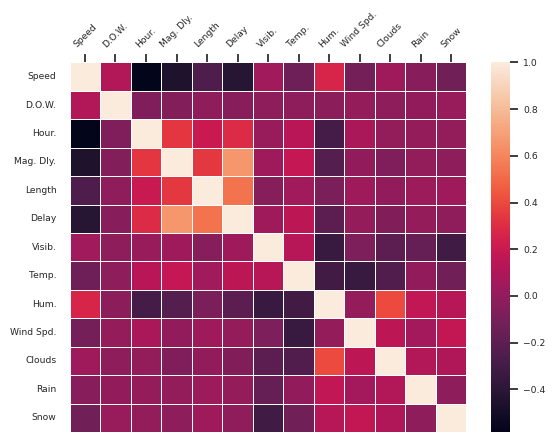

In [61]:
labels=["Speed", "D.O.W.", "Hour.", "Mag. Dly.", "Length", "Delay", "Visib.", "Temp.", "Hum.", "Wind Spd.", "Clouds", "Rain", "Snow"]

sns.set(font_scale=0.6)
ax = sns.heatmap(corr_mat.to_numpy(),linewidth=0.5,xticklabels=labels,yticklabels=labels)
ax.xaxis.tick_top()
plt.xticks(rotation=45)

plt.savefig("./plots/120_correlations.eps", format="eps", bbox_inches="tight")
plt.savefig("./plots/120_correlations.png", bbox_inches="tight")
plt.savefig("./plots/120_correlations.pdf", bbox_inches="tight")

# Drop unused cols

In [24]:
df.drop(columns=["close_to_yonge_detector", "close_to_gardiner_detector", "windDegree"],inplace=True)
df

,currentSpeed,magnitudeOfDelay,length,delay,event_description,dist_from_mid_point,visibility,temperature,FeelsLike,humidity,...,snow1h,cloudy,clear,atmosphere,snowy,rainy,month,day_of_week,hour,minute
0,94,2.0,372.918000,199.0,Backed up traffic,-1.000000,10.0,18.69,18.68,79,...,0.0,0,1,0,0,0,July,Thursday,12,45
1,94,0.0,302.765346,0.0,Lane closed,7.069406,10.0,18.69,18.68,79,...,0.0,0,1,0,0,0,July,Thursday,12,45
2,94,0.0,302.765346,0.0,Roadworks,7.069406,10.0,18.69,18.68,79,...,0.0,0,1,0,0,0,July,Thursday,12,45
3,94,0.0,273.828235,0.0,Roadworks,-1.000000,10.0,18.69,18.68,79,...,0.0,0,1,0,0,0,July,Thursday,12,45
4,94,0.0,254.244867,0.0,Lane closed,7.111841,10.0,18.69,18.68,79,...,0.0,0,1,0,0,0,July,Thursday,12,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94011,92,0.0,0.000000,0.0,No incidents,-1.000000,10.0,9.77,6.07,41,...,0.0,0,1,0,0,0,March,Sunday,21,35
94012,92,0.0,0.000000,0.0,No incidents,-1.000000,10.0,9.77,6.07,41,...,0.0,0,1,0,0,0,March,Sunday,21,40
94013,79,3.0,432.591314,136.0,Stopped traffic,7.111841,10.0,9.64,5.90,40,...,0.0,0,1,0,0,0,March,Sunday,21,45
94014,92,1.0,735.008314,148.0,Slow traffic,-1.000000,10.0,9.61,5.86,40,...,0.0,0,1,0,0,0,March,Sunday,21,50


# Onehot encode categorical attributes
- Also cast all fields to float32

In [25]:
categorical_attrs = ["event_description","month", "day_of_week"]

transformed_df = pd.get_dummies(df, columns=categorical_attrs, prefix="", prefix_sep="")
transformed_df = transformed_df.astype("float32")
transformed_df

,currentSpeed,magnitudeOfDelay,length,delay,dist_from_mid_point,visibility,temperature,FeelsLike,humidity,windSpeed,...,November,October,September,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,94.0,2.0,372.917999,199.0,-1.000000,10.0,18.690001,18.68,79.0,2.57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,94.0,0.0,302.765350,0.0,7.069406,10.0,18.690001,18.68,79.0,2.57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,94.0,0.0,302.765350,0.0,7.069406,10.0,18.690001,18.68,79.0,2.57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,94.0,0.0,273.828247,0.0,-1.000000,10.0,18.690001,18.68,79.0,2.57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,94.0,0.0,254.244873,0.0,7.111841,10.0,18.690001,18.68,79.0,2.57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94011,92.0,0.0,0.000000,0.0,-1.000000,10.0,9.770000,6.07,41.0,9.26,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
94012,92.0,0.0,0.000000,0.0,-1.000000,10.0,9.770000,6.07,41.0,9.26,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
94013,79.0,3.0,432.591309,136.0,7.111841,10.0,9.640000,5.90,40.0,9.26,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
94014,92.0,1.0,735.008301,148.0,-1.000000,10.0,9.610000,5.86,40.0,9.26,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [29]:
transformed_df.rename({
    'magnitudeOfDelay': "Mag. of Delay",
    'length':"Length",
    'delay': "Delay",
    'dist_from_mid_point':"Dist. From Mid. Point",
    'visibility': "Visibility",
    'temperature': "Temperature",
    'FeelsLike': "Feels Like",
    'humidity':"Humidity",
    'windSpeed': "Wind Speed",
    'cloudsAll': "Clouds All",
    'rain1h': "Rain (1h)",
    'snow1h': "Snow (1h)",
    'cloudy':"Cloudy",
    'clear':"Clear",
    'atmosphere':"Atmosphere",
    'snowy': "Snowy",
    'rainy':"Rainy",
    'hour':"Hour",
    'minute':"Minute",
    'Bridge demolition work':'Bridge demo. work',
    'Highway reduced to one lane':'Hwy. reduced to one lane',
    'Obstruction on the road':"Obst. on the road",
}, axis=1, inplace=True)

In [30]:
transformed_df.to_csv("./data/gardiner_flow_weather_incidents.csv.zip", index=False, compression="zip")